In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import recall_score, precision_score, f1_score

In [2]:
DATA_JSON_FILE = r'D:\Courses\Projects\Spam emails Classification\email-text-data.json'

In [3]:
data = pd.read_json(DATA_JSON_FILE)

In [4]:
data.tail()

,MESSAGE,CATEGORY,FILE_NAME
5791,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676
5794,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896
5795,"Hi there,\n\n\n\nNow this is probably of no us...",0,01400.f897f0931e461e7b2e964d28e927c35e


In [5]:
data.shape

(5796, 3)

In [6]:
data.sort_index(inplace=True)

In [7]:
data.tail()

,MESSAGE,CATEGORY,FILE_NAME
5791,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676
5794,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896
5795,"Hi there,\n\n\n\nNow this is probably of no us...",0,01400.f897f0931e461e7b2e964d28e927c35e


In [8]:
vectorizer = CountVectorizer(stop_words='english')

In [9]:
all_features = vectorizer.fit_transform(data.MESSAGE)

In [10]:
all_features.shape

(5796, 102694)

In [11]:
vectorizer.vocabulary_

{'doctype': 34865,
 'html': 48472,
 'public': 74013,
 'w3c': 93790,
 'dtd': 36354,
 'transitional': 88580,
 'en': 38432,
 'head': 47011,
 'meta': 61701,
 'content': 30249,
 '3d': 6385,
 'text': 86991,
 'charset': 27796,
 '3dwindows': 7297,
 '1252': 2025,
 'http': 48497,
 'equiv': 38991,
 '3dcontent': 6908,
 'ype': 99054,
 'mshtml': 63412,
 '00': 0,
 '2314': 4235,
 '1000': 1497,
 '3dgenerator': 6987,
 'body': 24390,
 'inserted': 52119,
 'calypso': 26557,
 'table': 86120,
 'border': 24581,
 '3d0': 6386,
 'cellpadding': 27375,
 'cellspacing': 27383,
 '3d2': 6525,
 'id': 49828,
 '3d_calyprintheader_': 6758,
 'ules': 90247,
 '3dnone': 7130,
 'style': 84723,
 'color': 29367,
 'black': 23893,
 'display': 34406,
 'width': 95488,
 '100': 1496,
 'tbody': 86462,
 'tr': 88442,
 'td': 86548,
 'colspan': 29390,
 '3d3': 6570,
 'hr': 48373,
 '3dblack': 6863,
 'noshade': 65849,
 'size': 82347,
 '3d1': 6417,
 'end': 38496,
 'font': 42257,
 '000000': 4,
 'face': 40498,
 '3dverdana': 7283,
 'arial': 20116

In [57]:
X_train, X_test, y_train, y_test = train_test_split(all_features, data.CATEGORY, 
                                                   test_size=0.3, random_state=88)

In [58]:
X_train.shape

(4057, 102694)

In [59]:
X_test.shape

(1739, 102694)

In [60]:
classifier = MultinomialNB()

In [61]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [77]:
y_predict = classifier.predict(X_test)

In [62]:
nr_correct = (y_test == classifier.predict(X_test)).sum()

In [63]:
nr_correct

1641

In [64]:
nr_incorrect = y_test.size - nr_correct

In [65]:
nr_incorrect

98

In [66]:
fraction_wrong = nr_incorrect / (nr_correct + nr_incorrect)
print(f'The (testing) accuracy of the model is {1-fraction_wrong:.2%}')

The (testing) accuracy of the model is 94.36%


In [67]:
classifier.score(X_test, y_test)

0.9436457734330075

In [84]:
classifier.score(X_train, y_train)

0.9682031057431599

**Challenge:** For the testing dataset calculate the recall, precision and f1 score. Google for the scikit learn documentation on this topic to work it out. 

In [68]:
recall_score(y_test, classifier.predict(X_test))

0.8303249097472925

In [69]:
precision_score(y_test, classifier.predict(X_test))

0.9913793103448276

In [70]:
f1_score(y_test, classifier.predict(X_test))

0.9037328094302555

In [26]:
example = ['get viagra for free now!', 
          'need a mortgage? Reply to arrange a call with a specialist and get a quote', 
          'Could you please help me with the project for tomorrow?', 
          'Hello Jonathan, how about a game of golf tomorrow?', 
          'Ski jumping is a winter sport in which competitors aim to achieve the longest jump after descending from a specially designed ramp on their skis. Along with jump length, competitor\'s style and other factors affect the final score. Ski jumping was first contested in Norway in the late 19th century, and later spread through Europe and North America in the early 20th century. Along with cross-country skiing, it constitutes the traditional group of Nordic skiing disciplines.'
          ]

In [27]:
doc_term_matrix = vectorizer.transform(example)

In [28]:
classifier.predict(doc_term_matrix)

array([1, 1, 0, 0, 0], dtype=int64)

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1185
           1       0.99      0.83      0.90       554

    accuracy                           0.94      1739
   macro avg       0.96      0.91      0.93      1739
weighted avg       0.95      0.94      0.94      1739



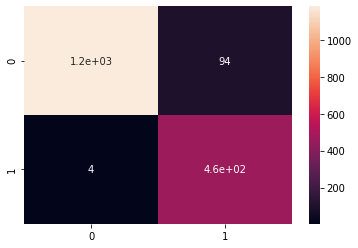

In [83]:
cm = confusion_matrix(y_predict, y_test)

sns.heatmap(cm, annot = True)

plt.show()